<a href="https://colab.research.google.com/github/AliKarimiENT/NLP_HW1/blob/main/NLPHW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install libraries

In [2]:
pip install hazm

     |████████████████████████████████| 316 kB 4.3 MB/s 
     |████████████████████████████████| 233 kB 48.5 MB/s 
     |████████████████████████████████| 1.4 MB 36.0 MB/s 
  Created wheel for nltk: filename=nltk-3.3-py3-none-any.whl size=1394488 sha256=4d32e0cd4502d3f623d77ec77c8baa1acdd336d22de6f0655f675316f06a7413
  Stored in directory: /root/.cache/pip/wheels/9b/fd/0c/d92302c876e5de87ebd7fc0979d82edb93e2d8d768bf71fac4
  Created wheel for libwapiti: filename=libwapiti-0.2.1-cp37-cp37m-linux_x86_64.whl size=154057 sha256=f3fb813248f58e2593983f96466b081f96394d79e35e00bf9fa3481d45a90aa9
  Stored in directory: /root/.cache/pip/wheels/ab/b2/5b/0fe4b8f5c0e65341e8ea7bb3f4a6ebabfe8b1ac31322392dbf
Successfully built nltk libwapiti
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


Imports

In [3]:
import re
from os import remove
from hazm import word_tokenize
from hazm import Stemmer
from tensorflow import keras
from keras.preprocessing import text
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Reading txt file and getting verses

Here we need to do some processes


1.   First open source txt file and initial dataset
2.   On every line of dataset we check somethings like not being empty or \n and also don't contain dash and number
3.   Here we have two functions to check the above conditional statements. Functiona are **hasNumbers()** and **hasDash()**



In [5]:
# with this function we check that it contains number in the text or not
def hasNumbers(inputString) :
  for character in inputString :
    if character.isdigit() :
      return True
  return False

def hasDash(inputString) :
  for character in inputString :
    if character == '-' :
      return True
  return False 


with open('/content/ShamsDaftar6.doc_filename=ShamsDaftar6.txt') as f:
  dataSet = f.readlines()

verses = []
for line in dataSet :
  if line != ' ' and line != '\n' and hasNumbers(line) == False  and hasDash(line)==False:
    if dataSet.index(line) != 0 :
      verses.append(line.replace('\t',' '))


Next Step is reading **stopwords.txt** file and append them to **stopwords list**

Here you can see our stopwords list

In [6]:
with open('/content/stopwords.txt') as f:
  stops = f.readlines()
stopWords = []
for stop in stops :
  stopWords.append(re.sub('\n','',stop.replace('\ufeff','')))
print(stopWords)

['!', '"', '#', '(', ')', '*', ',', '-', '.', '/', ':', '[', ']', '«', '»', '،', '؛', '؟اتفاقا', 'اتفاقا', 'احتراما', 'احتمالا', 'اري', 'اری', 'آری', 'آري', 'از', 'ازجمله', 'اساسا', 'است', 'اش', 'اشكارا', 'آشكارا', 'اصلا', 'اصولا', 'اغلب', 'اكثرا', 'اكنون', 'الان', 'الآن', 'البته', 'ام', 'اما', 'امد', 'آمد', 'امدم', 'آمد', 'امدن', 'آمدن', 'امدند', 'آمدند', 'امده', 'آمده', 'امدي', 'آمدی', 'امديد', 'آمدید', 'امديم', 'آمدیم', 'امروزه', 'امسال', 'امشب', 'ان', 'آن', 'اند', 'انشاالله', 'انصافا', 'انطور', 'آنطور', 'انقدر', 'آنقدر', 'انها', 'آنها', 'انچنان', 'آنچنان', 'انگار', 'او', 'اورد', 'آورد', 'اوردم', 'آوردم', 'اوردن', 'آوردن', 'اوردند', 'آوردند', 'اورده', 'آورده', 'اوردي', 'اوردی', 'آوردی', 'اورديد', 'آوردید', 'اورديم', 'آوردیم', 'اورم', 'آورم', 'اورند', 'آورند', 'اوري', 'اوری', 'آوری', 'اوريد', 'آورید', 'اوريم', 'آوری', 'اولا', 'اي', 'آی', 'ای', 'ايا', 'آیا', 'ايد', 'ايشان', 'ايم', 'اين', 'ايند', 'آيند', 'اينطور', 'اينقدر', 'اينك', 'اینک', 'این', 'اينها', 'اينچنين', 'اينگونه', 'ايي', '

Now it's time to use **Hazm** **Library** to tokenize each sentence

**Hazm** is a python library for digesting Persian Text

Now we add all words to **concept_words** list

In [7]:
concept_words = []
for verse in verses:
  # now we must add all words in the list to words list
  for word in word_tokenize(verse):
    for word in verse.split():
      concept_words.append(word)

**Stemmer** is another class from **Hazm** library

Stemmer removes adding symboles from Persian words

Remove stop words from verses

After these steps we initial corpus 

**words list** is another list of corpus's words without 

And finaly we convert corpus list to set of words

By converting to set , it will remove the duplicates from the list

In [8]:
# for removing stop words from our words list we need to this process
corpus  = [] #concept words list is a list that contains list of words without stopWords
stemmer = Stemmer()
for word in concept_words :
  wd = stemmer.stem(word)
  if word not in stopWords:
    if wd not in stopWords:
        corpus.append(wd)
    # else:
    #     if word != wd :
    #       corpus.append(word)
words = []
for word in corpus:
  words.append(word)
corpus = set(corpus)
print(corpus)

{'خسبد', 'ید', 'فاتح', 'خلیل', 'لحبیب', 'کور', 'آخر', 'نهاده', 'سریان', 'غنیم', 'بوسد', 'مثنا', 'حقست', 'یمن', 'هجو', 'پاغنده', 'خوشه', 'منیو', 'جس', 'سیرک', 'فریضه', 'کبو', 'نیابند', 'دارو', 'تیه', 'نگاره', 'فزود', 'دوربین', 'بمو', 'نالد', 'فروبرد', 'عما', 'درنیاب', 'اثبات', 'لسان', 'کشوف', 'صواب', 'سوخت', 'نسوزد', 'بگداخت', 'بخشد', 'کناره', 'مالک', 'تسل', 'سالک', 'مسلمان', 'حمله', 'وزیر', 'تصحیح', 'خاوندگار', 'زهره', 'ارتقا', 'کبریت', 'شنگول', 'نساز', 'فرشتگان', 'مقال', 'طاق', 'دروغ', 'نستیز', 'اخترانست', 'قلاب', 'لانه', 'لن', 'بزد', 'عطار', 'روانست', 'دوتا', 'طلعت', 'اندرباف', 'بتابد', 'نوبزاده', 'خسبند', 'سنبوسه', 'بند', 'پذیرا', 'وه', 'راغب', 'دگرباره', 'ذرار', 'انتظار', 'ماند', 'بسوزید', 'متاع', 'سنگینک', 'پختگ', 'دیوانگ', 'جوش', 'زاینده', 'سنگین', 'مور', 'بره', 'نصر', 'پدیدست', 'روند', 'همدرد', 'بگردان', 'بدخو', 'ایشان', 'کابین', 'بدرا', 'بپوشد', 'نویسد', 'گهرافشان', 'دوشاب', 'نشیب', 'پرافزا', 'فناا', 'دهر', 'مهتر', 'هدهد', 'باف', 'گرمابه', 'بفروزد', 'بشویید', 'نقره', 'وقت', 'در

In [9]:
print(len(corpus))

6364


Here we create two dictionaries which translates words to indexes and indexes to words.



In [10]:
wordToIndex = {}
indexToWord = {}


vocab_size = len(corpus)
for i,word in enumerate(corpus):
    wordToIndex[word] = i
    indexToWord[i] = word 

print(wordToIndex.items())
# Now each unique word from the corpus is a part of our vocabulary now with a unique numeric identifier


dict_items([('خسبد', 0), ('ید', 1), ('فاتح', 2), ('خلیل', 3), ('لحبیب', 4), ('کور', 5), ('آخر', 6), ('نهاده', 7), ('سریان', 8), ('غنیم', 9), ('بوسد', 10), ('مثنا', 11), ('حقست', 12), ('یمن', 13), ('هجو', 14), ('پاغنده', 15), ('خوشه', 16), ('منیو', 17), ('جس', 18), ('سیرک', 19), ('فریضه', 20), ('کبو', 21), ('نیابند', 22), ('دارو', 23), ('تیه', 24), ('نگاره', 25), ('فزود', 26), ('دوربین', 27), ('بمو', 28), ('نالد', 29), ('فروبرد', 30), ('عما', 31), ('درنیاب', 32), ('اثبات', 33), ('لسان', 34), ('کشوف', 35), ('صواب', 36), ('سوخت', 37), ('نسوزد', 38), ('بگداخت', 39), ('بخشد', 40), ('کناره', 41), ('مالک', 42), ('تسل', 43), ('سالک', 44), ('مسلمان', 45), ('حمله', 46), ('وزیر', 47), ('تصحیح', 48), ('خاوندگار', 49), ('زهره', 50), ('ارتقا', 51), ('کبریت', 52), ('شنگول', 53), ('نساز', 54), ('فرشتگان', 55), ('مقال', 56), ('طاق', 57), ('دروغ', 58), ('نستیز', 59), ('اخترانست', 60), ('قلاب', 61), ('لانه', 62), ('لن', 63), ('بزد', 64), ('عطار', 65), ('روانست', 66), ('دوتا', 67), ('طلعت', 68), ('اندرباف

Now,we want a list of our sentences as list of words:

Here we also not being in stopwords list and then append to sentece words list

In [11]:
sentences = []
for verse in verses:
  sentence = []
  for word in verse.split():
    wd = stemmer.stem(word)
    if word not in stopWords:
      if wd not in stopWords:
        if wd not in sentence:
          sentence.append(wd) 
  
  sentences.append(sentence)
  
print(sentences)

[['مونس', 'یار', 'زر', 'فارغ'], ['خدایا', 'حرم', 'مرد', 'دنیا', 'فارغ'], ['نگارا', 'همدرد'], ['بتا', 'زیبا', 'نیکو', 'گدارو', 'سیرست', 'فلک'], ['طمع', 'آدم', 'بیگانه', 'خال'], ['بیا', 'مه', 'نعم', 'جو', 'ابلیس', 'شه', 'صاحب'], ['ابلیس', 'سقط', 'ثنا', 'جفا', 'وفا', 'کر'], ['زه', 'اقبال', 'درویش', 'اسرار', 'خویش'], ['جهان', 'خیال', 'خواب', 'پیچ', 'خفته', 'بدانست'], ['خیال', 'بیند', 'خفته', 'اندیشه', 'فرورفته', 'خواب', 'آشفته', 'بجست', 'نع'], ['دیده', 'باغ', 'بیدار', 'گشت'], ['امیر', 'دل', 'گوید', 'عاشق', 'جامه', 'بیزار'], ['قحط', 'عشق', 'خباز', 'دستار'], ['ببین', 'جامه', 'طیار', 'خودکامه', 'ملایک', 'ایو', 'زنگار'], ['لو', 'فرن', 'آزاد', 'مستغن', 'ملک', 'افتد', 'اندیشه', 'زار'], ['دربند', 'بیاید', 'یار', 'روحان', 'گوید', 'نیار'], ['عصا', 'عشق', 'خارا', 'چشمه', 'جوع', 'البقر', 'یارا', 'بقار'], ['فروریزد', 'سخن', 'دل', 'لابه', 'برون', 'خم'], ['صاحب', 'الدار', 'الحسن', 'جار', 'فاوقد', 'نارا', 'یطف', 'نوره', 'نار'], ['تاز', 'پارس', 'گوید', 'بدخدمت', 'سو'], ['نکرد', 'جر', 'مه', 'انعا', 'عا', '

Now we will train our data

It will gives us a list of paired words , becuase the  **window** **size** is 2

In [12]:
data = []
WINDOW_SIZE = 2
for sentence in sentences :
  for word_index , word in enumerate(sentence) :
    for nb_word in sentence[max(word_index - WINDOW_SIZE,0) : min(word_index + WINDOW_SIZE , len(sentences)) + 1] :
      if nb_word != word :
        data.append([word,nb_word])
data = np.asarray(data)

print(data)

[['مونس' 'یار']
 ['مونس' 'زر']
 ['یار' 'مونس']
 ...
 ['حرف' 'معتن']
 ['معتن' 'نماند']
 ['معتن' 'حرف']]


Lets define our **One Hot Function**

This function will convert numbers to one hot vectors

In [13]:
def to_one_hot(data_point_index,vocab_size):
  temp = np.zeros(vocab_size)
  temp[data_point_index] = 1
  return temp

In [ ]:
print(len(data))

103474


Initail x and y train values 

x train is a list of our input words in one hot form

y train is a list of out output words in one hot form

Here I had a challenge while using my **to_one_hot()** function , that colab RAM crashed on the runtime. So I decided to use tensorflow's one_hot() function


In [14]:
x_train = []
y_train = []


for data_word in data:
  
  x_train.append(tf.one_hot(wordToIndex[data_word[0]],vocab_size))
  y_train.append(tf.one_hot(wordToIndex[data_word[1]],vocab_size))

#convert them to numpy arrays
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)


Both x_traing and y_train have shape :

In [15]:
print(x_train.shape,y_train.shape)

(103474, 6364) (103474, 6364)


It means that we have 103474 points , where each point has 6364 dimenstions

Now it's time to make **Tensorflow model**

Here I have used **tf.compat.v1.placeholder** for feeding actual training examples

In [16]:
tf.compat.v1.disable_eager_execution() #becuase of tensor flow upgrade I had to use disable eager execution

x = tf.compat.v1.placeholder(tf.float32, shape=(None, vocab_size),name=None)
y_label = tf.compat.v1.placeholder(tf.float32, shape=(None, vocab_size),name=None)

print(x)
print(y_label)

Tensor("Placeholder:0", shape=(None, 6364), dtype=float32)
Tensor("Placeholder_1:0", shape=(None, 6364), dtype=float32)


Convert training data into **Embedded representation**

In [17]:
EMBEDDING_DIM = 20
W1 = tf.Variable(tf.random.normal([vocab_size,EMBEDDING_DIM]))
b1 = tf.Variable(tf.random.normal([EMBEDDING_DIM])) #bias

hidden_representation = tf.add(tf.matmul(x,W1),b1)


Making a prediction about neighbours with softmax

In [18]:
W2 = tf.Variable(tf.random.normal([EMBEDDING_DIM,vocab_size]))
b2 = tf.Variable(tf.random.normal([vocab_size]))

prediction = tf.nn.softmax(tf.add(tf.matmul(hidden_representation,W2),b2))
print(prediction)

Tensor("Softmax:0", shape=(None, 6364), dtype=float32)


Let's go to train it

We do some functions here as follows


*   define session variable which it will define the operaions that we specified in our code
*   in a session because we want to hold values to our variables we need to call **Initializer** function first

*   define the loss function 
fot this propose I used tensorflow's reduce mean function which computes the mean of elements across dimenstions of a tensor
*   initial train step with using **GradientDescentOptimizer** which implements gradient descent algotithm 





In [19]:
# define session 
session = tf.compat.v1.Session()

init = tf.compat.v1.global_variables_initializer()

session.run(init)

# define the loss function
cross_entropy_loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.math.log(prediction),[1]))
# define the training step
train_step = tf.compat.v1.train.GradientDescentOptimizer(0.1).minimize(cross_entropy_loss)

n_iters = 50

# train for n_iter iterations

print(session.run(W1))
# The reason that I have commented these below lines is that the colab will crash according to its RAM usage

# for _ in range(n_iters) :
  # session.run(train_step,feed_dict={x: x_train, y_label: y_train})
  # print('loss is : ', session.run(cross_entropy_loss, feed_dict={x: x_train, y_label: y_train}))

[[ 0.93424356  0.8068976   0.00808782 ...  0.64564     0.4414587
   0.23943092]
 [-0.47621977  1.287752    0.28202727 ... -0.23104028 -0.01047432
  -2.3858862 ]
 [-1.2361082   0.33640432  0.55396456 ...  0.3161624   0.5904736
  -0.05186057]
 ...
 [-0.16830821 -0.39655036 -0.14333506 ... -1.0634139   0.64065737
   0.606103  ]
 [-0.08973482 -0.00784276  2.4398     ...  0.6832521   1.7789655
  -0.32394338]
 [ 0.35946614 -0.16875894  0.9236827  ... -0.30252504  0.01404682
  -0.5017626 ]]


Adding bias

Vectors will initial with session run method by adding biases to embedding graph

In [57]:
vectors = session.run(W1+b1)

Here we have two important functions


*   **calculate_dist()**

    on this function we calculate destination between two vectors

*   **find_closest()**

    on this function we will return the nearest word with its destination to main word


In [58]:
def calculate_dist(vec1, vec2):
    return np.sqrt(np.sum((vec1-vec2)**2))
def find_closest(word_index, vectors):
    dictionary = {}
    query_vector = vectors[word_index]
    min_indexes = []
    for index, vector in enumerate(vectors):
        if calculate_dist(vector, query_vector) and not np.array_equal(vector, query_vector): # here we will use calculate_dist() and checking vectors not to be equal
            dist = calculate_dist(vector, query_vector) # set calculate dist function output to dist variable
            dictionary[index] = dist # adding dist to dictionary 

    sorted_by_value = dict(sorted(dictionary.items(),key= lambda item : item[1])) # we use sorted dictionary to select 20 nearest words with thier dist value
    key_list = list(sorted_by_value.keys()) 
    for i in range(20) :
      min_indexes.append([indexToWord[key_list[i]],sorted_by_value[key_list[i]]]) # indexToWord is used to get word with its index value | and also get dist between words from sorted dictionary
    return min_indexes

Now it's time to get 10 random numbers

We will find 20 nearest neighbours to each word

By numpy library we get 10 random numbers 

for each random number we use **find_closest()** to find nearest words indexes

after that we need to use **indexToWord** dictionary to find words

In [56]:
rand_words_index = np.random.randint(vocab_size , size=(1))
for index in rand_words_index :
  close_words_index = find_closest(index, vectors)
  print('Selected word is ',indexToWord[index])
  close_words = []
  for close in close_words_index :
    close_words.append(close)
  print(close_words)

Selected word is  هرجا
[['تس', 2.4698346], ['عیارسیما', 2.5054643], ['قبله', 2.5985646], ['دلستان', 2.7809134], ['دد', 2.7930236], ['خلوتخانه', 2.8773103], ['پزید', 3.0040538], ['باشید', 3.0510404], ['مشفق', 3.0566597], ['افروخت', 3.0981977], ['صلاح', 3.1045623], ['نقره', 3.1179104], ['کفته', 3.1236634], ['آگه', 3.1352494], ['خجال', 3.1437476], ['ثا', 3.166957], ['بهانه', 3.173194], ['کوته', 3.1741972], ['درد', 3.175086], ['دلان', 3.186537]]


In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
vectors = model.fit_transform(vectors)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(vectors, 'l2')

یار 0.8406024
زر 0.83698815
فارغ 0.11683096
مونس 0.06886361
یار 0.8406024
زر 0.83698815
فارغ 0.11683096
مونس 0.06886361
یار 0.8406024
زر 0.83698815
فارغ 0.11683096
مونس 0.06886361
یار 0.8406024
زر 0.83698815
فارغ 0.11683096
مونس 0.06886361
یار 0.8406024
زر 0.83698815
فارغ 0.11683096


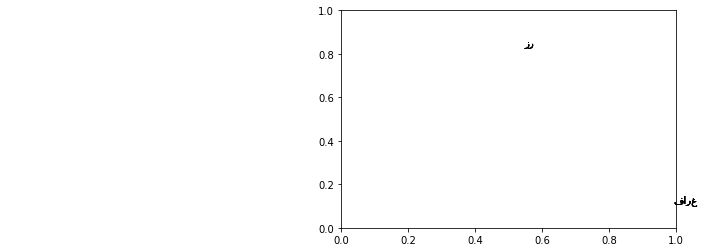

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for word in words[1:20]:
    print(word, vectors[wordToIndex[word]][1])
    ax.annotate(word, (vectors[wordToIndex[word]][0],vectors[wordToIndex[word]][1] ))
plt.show()